In [ ]:
# 라이브러리 
import pandas as pd # 데이터 분석용 라이브러리
import numpy as np # 수치 계산 라이브러리 
import seaborn as sns # matplotlib을 사용하기 쉽게 만든 시각화 라이브러리
import matplotlib.pyplot as plt #

In [ ]:
%matplotlib inline

In [ ]:
#한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 마이너스 폰트 깨지는 문제 방지
plt.rc("axes", unicode_minus=False)

# 흐릿한 글씨 방지
%config InlineBackend.figure_format = 'retina'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

## 데이터 불러오기

In [ ]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
df=pd.read_csv("/content/국민건강보험공단_건강검진정보_2017.csv",encoding="cp949")
df.shape

(1000000, 34)

# 전체 데이터 시각화 하기
- 100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장합니다.
- 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.


## 히스토그램
- 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진것을 확인할 수 있었습니다.
- 히스토그램을 사용하면 수치데이터를 bin 의 갯수만큼 그룹화 해서 도수분포표를 만들고 그 결과를 시각화 합니다.
- 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


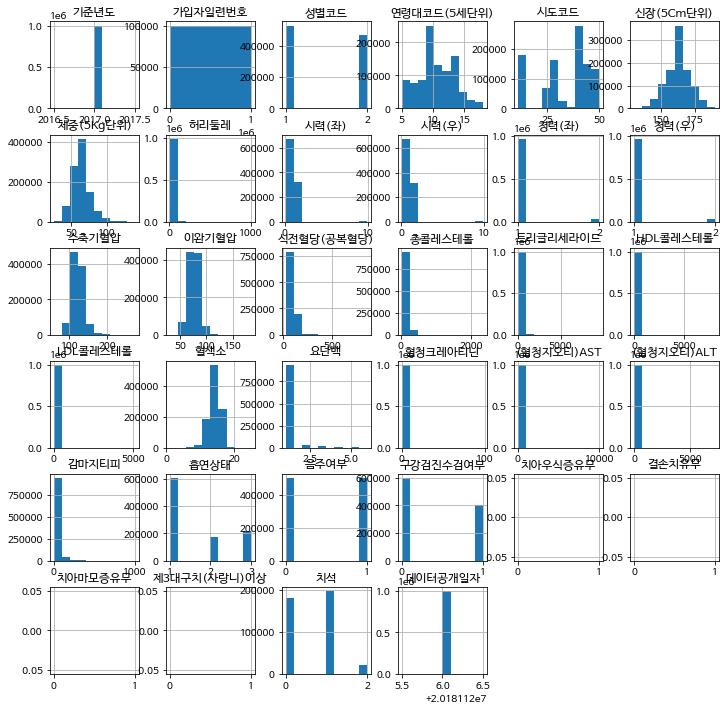

In [ ]:
# 전체 데이터에 대한 히스토그램을 출력합니다.
h = df.hist(figsize=(12,12))

## 슬라이싱을 사용해 히스토그램 그리기

*   슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
*   슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
*iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:, :]을 사용합니다.
* 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정할 수 있습니다.


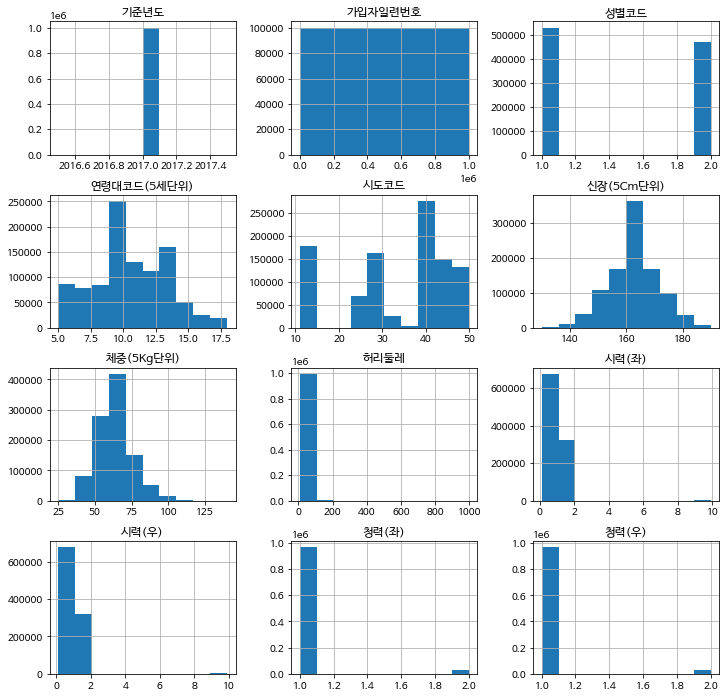

In [ ]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그립니다.
# [행, 열]
h = df.iloc[:,:12].hist(figsize=(12,12))

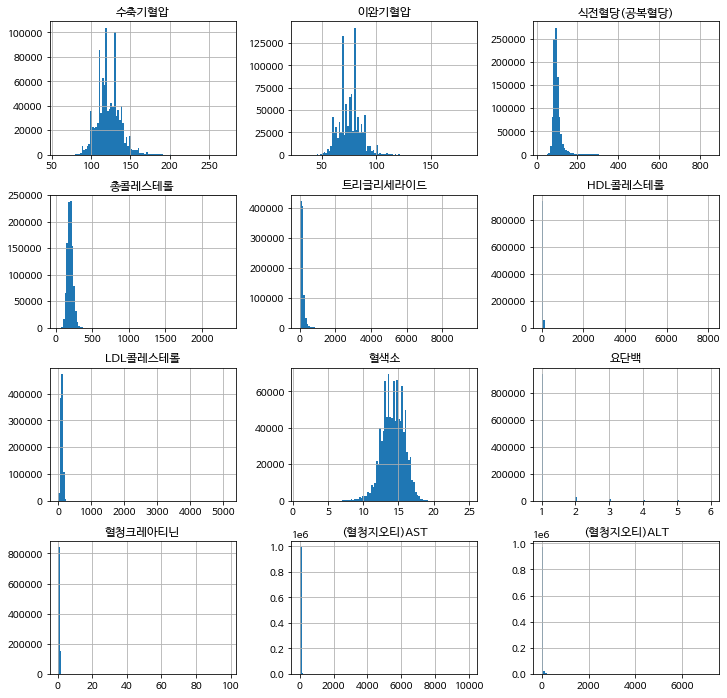

In [ ]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:,12:24].hist(figsize=(12,12),bins=100)

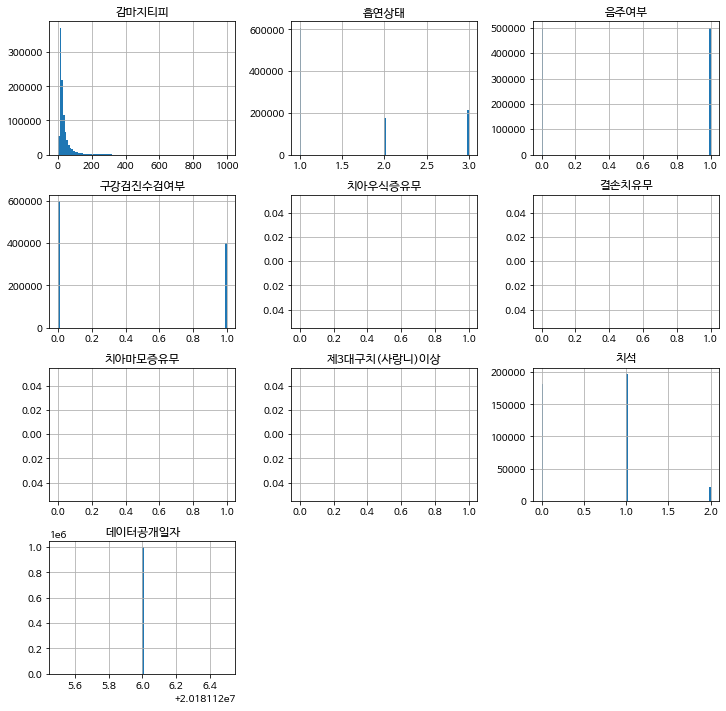

In [ ]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지(24:) 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:,24:].hist(figsize=(12,12),bins=100)

# 샘플데이터 추출하기
- seaborn 의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래 걸립니다.
- 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다.



In [ ]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출합니다. 
# random_state 를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 random_state를 고정하기도 합니다. 
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정시키는 역할만 합니다.

df_sample = df.sample(1000,random_state=1)
df_sample.shape

(1000, 34)

# 데이터 시각화 도구 Seaborn 사용하기
- https://seaborn.pydata.org/
- seaborn 은 https://matplotlib.org/ 을 사용하기 쉽게 만들어 졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.

#범주형(카테고리) 데이터 시각화
- countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
- value_counts 로 구한 값을 시각화 한다고 보면 됩니다.

### countplot - 음주여부

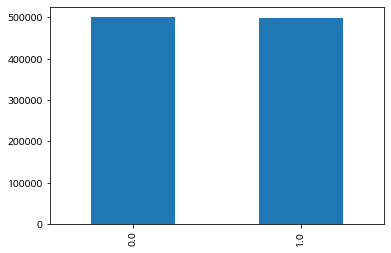

In [ ]:
# 음주여부에 따른 countplot을 그립니다.
df["음주여부"].value_counts().plot.bar()

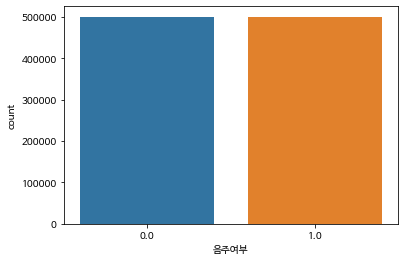

In [ ]:
sns.countplot(x="음주여부",data=df)

## hue 옵션 사용하기

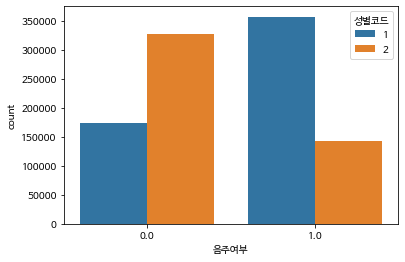

In [ ]:
# 음주여부에 따른 countplot을 그리고 hue 를 사용해 성별코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다.
# 또, seaborn 에서 제공하는 폰트 설정을 사용하실 수도 있습니다.
# 다만, 이 때 seaborn 의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다.
# Mac
# sns.set(font_scale=1.5, font="AppleGothic")
# Window
# sns.set(font_scale=1.5, font="Malgun Gothic")

sns.countplot(data=df,x="음주여부",hue="성별코드")

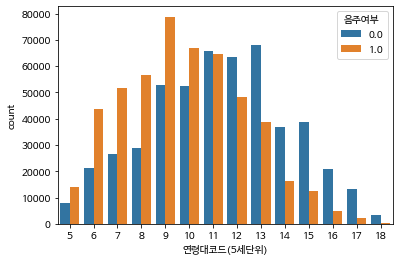

In [ ]:
# countplot으로 연령대별 음주여부를 봅니다.
# hue를 사용해 다른 색상으로 표현합니다.
sns.countplot(data=df,x="연령대코드(5세단위)",hue="음주여부")

## countplot - 키와 몸무게
- 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
- 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
- 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

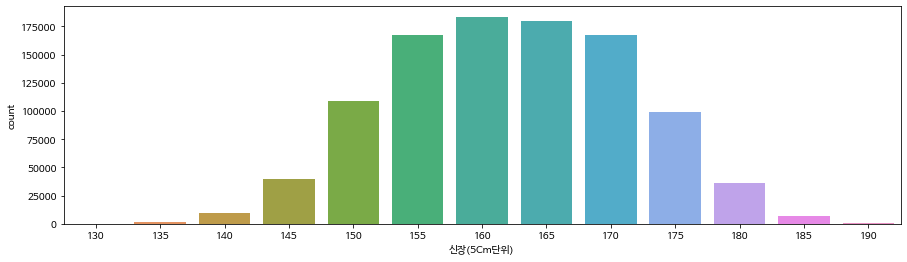

In [ ]:
# counplot으로 키를 봅니다.
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="신장(5Cm단위)")

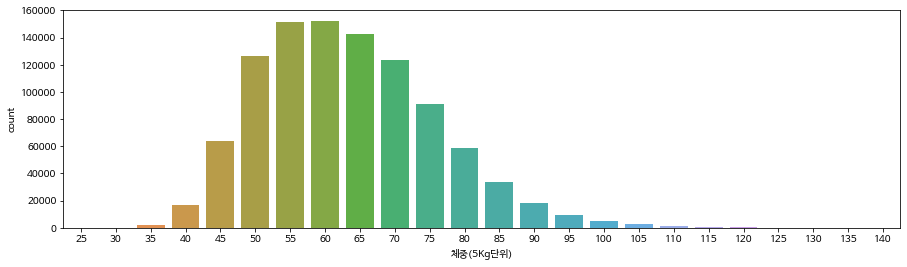

In [ ]:
# counplot으로 체중을 봅니다.
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="체중(5Kg단위)")

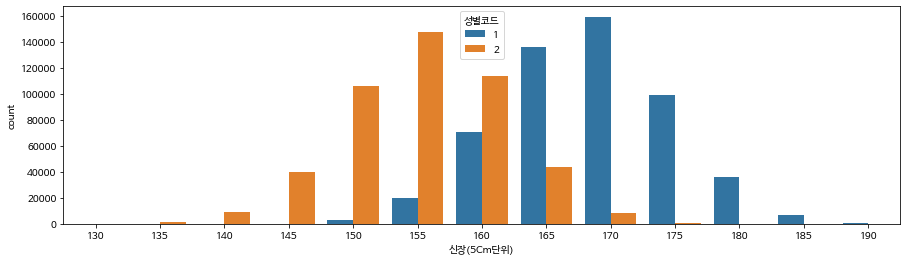

In [ ]:
# counplot으로 신장(5Cm단위)를 봅니다.
# 성별에 따른 키의 차이를 봅니다.
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="신장(5Cm단위)",hue="성별코드")

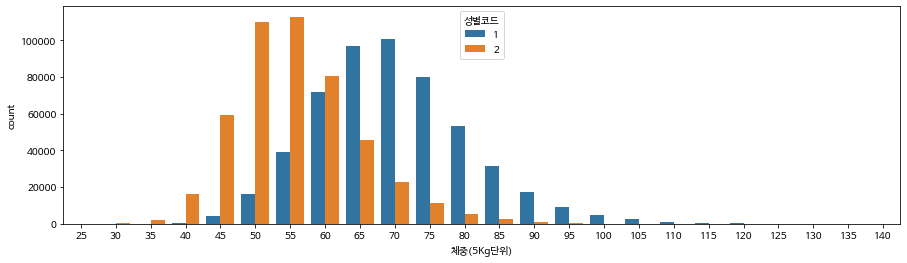

In [ ]:
# 성별에 따른 체중의 차이를 봅니다.
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="체중(5Kg단위)",hue="성별코드")

## barplot - 수치형 vs 범주형 데이터 시각화

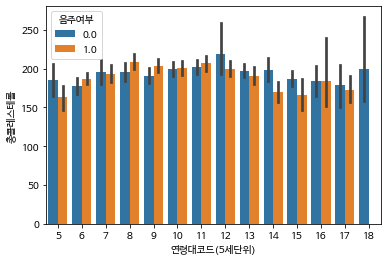

In [ ]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue 로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다.
sns.barplot(data=df_sample, x="연령대코드(5세단위)",y="총콜레스테롤",hue="음주여부")

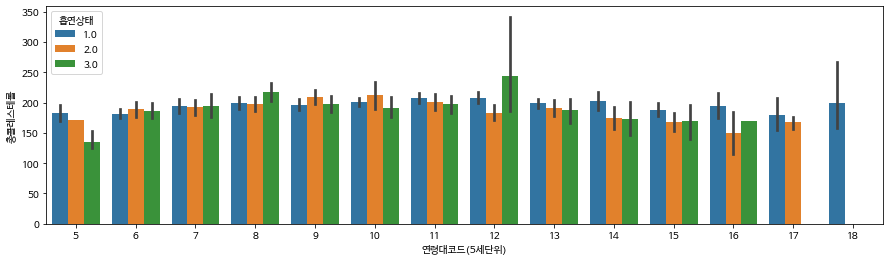

In [ ]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)",y="총콜레스테롤",hue="흡연상태")

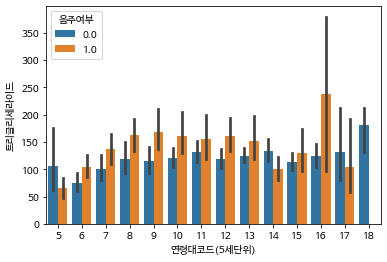

In [ ]:
# 트리글리세라이드(중성지방) 에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다.
sns.barplot(data=df_sample,x="연령대코드(5세단위)",y="트리글리세라이드",hue="음주여부")
#si-> 신뢰구간 기본값 95

# 음주를 하는 사람이 트리글리세라이드(중성지방수치)가 높은 경향이 있음.

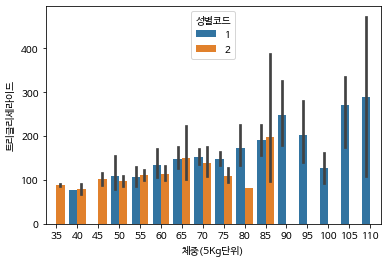

In [ ]:
# 음주여부와 체중(5Kg 단위)을 성별에 따라 봅니다.
sns.barplot(data=df_sample,x="체중(5Kg단위)",y="트리글리세라이드",hue="성별코드")

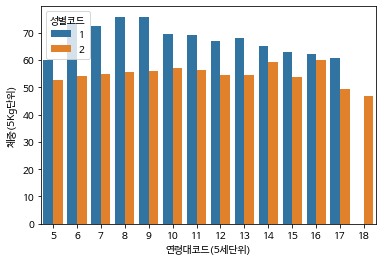

In [ ]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위) 을 음주여부에 따라 barplot으로 그립니다.
sns.barplot(data=df_sample,x="연령대코드(5세단위)",y="체중(5Kg단위)",hue="성별코드",ci=None)

# 음주를 하는 사람들이 체중이 많이 나가는 경향이 보임.

## lineplot and pointplot

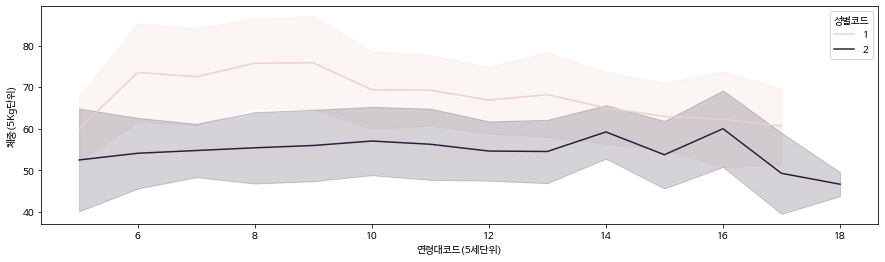

In [ ]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위) 을 성별코드에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample,x="연령대코드(5세단위)",y="체중(5Kg단위)",hue="성별코드",ci="sd")

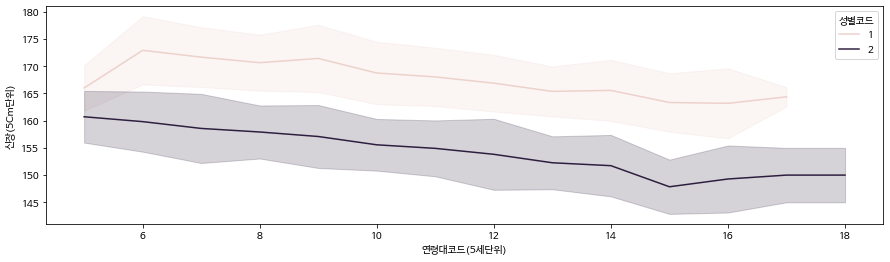

In [ ]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위) 을 성별코드에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample,x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="성별코드",ci="sd")

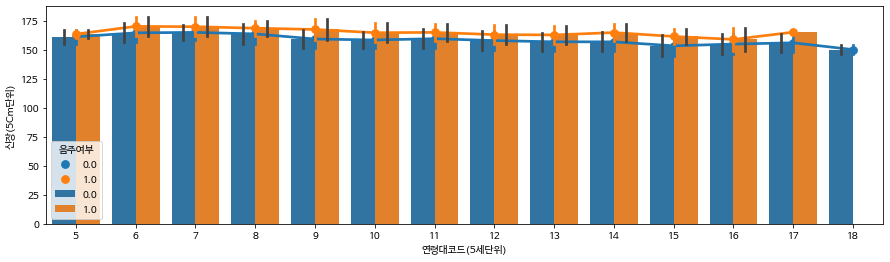

In [ ]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위) 을 음주여부에 따라 pointplot과 barplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample,x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="음주여부",ci="sd")
sns.barplot(data=df_sample,x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="음주여부",ci="sd")

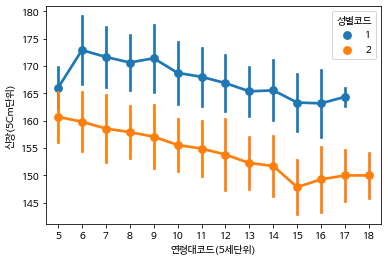

In [ ]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위) 을 성별코드에 따라 pointplot으로 그립니다.
sns.pointplot(data=df_sample,x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="성별코드",ci="sd")

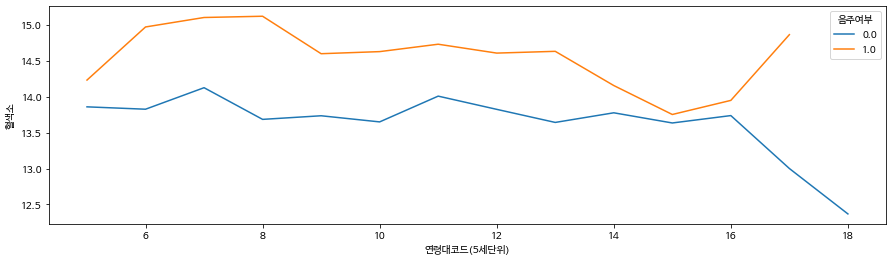

In [ ]:
# 연령대코드(5세단위) 에 따른 혈색소를 음주여부에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample,x="연령대코드(5세단위)",y="혈색소",hue="음주여부",ci=None)

## boxplot
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

- 상자 수염 그림 - 위키백과, 우리 모두의 백과사전

- 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
- 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.
<ul> 1.최솟값 <br> 2.제 1사분위수 <br>3.제 2사분위수( ), 즉 중앙값 <br>4.제 3 사분위 수( ) <br>5.최댓값 <br>

</ul>

- Box plot 이해하기 :
<ol> 1. 박스 플롯에 대하여 :: -[|]- Box and Whisker <br>
     2. Understanding Boxplots – Towards Data Science </ol>

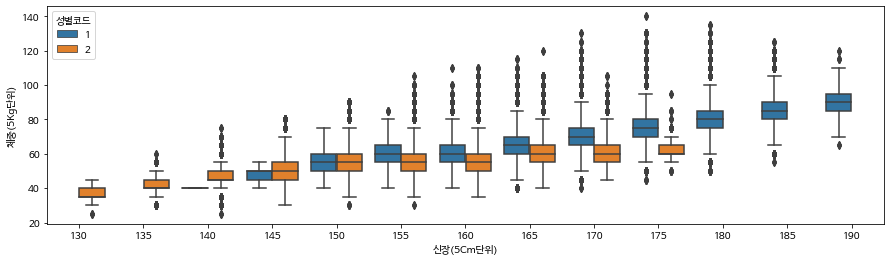

In [ ]:
# boxplot으로 신장(5Cm단위) 에 따른 체중(5Kg 단위) 을 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15,4))
sns.boxplot(data=df,x="신장(5Cm단위)",y="체중(5Kg단위)",hue="성별코드")

### violinplot


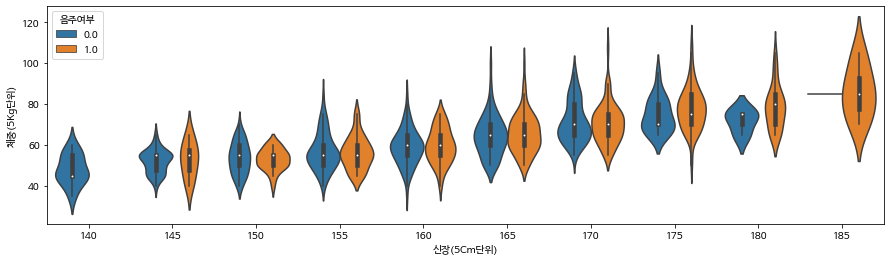

In [ ]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x="신장(5Cm단위)",y="체중(5Kg단위)",hue="음주여부")

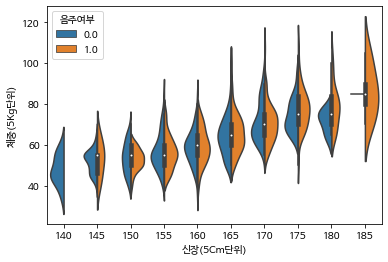

In [ ]:
# violinplot의 split 기능을 사용해 봅니다. 
# 흰 색 값은 중앙값
sns.violinplot(data=df_sample,x="신장(5Cm단위)",y="체중(5Kg단위)",hue="음주여부",split=True)

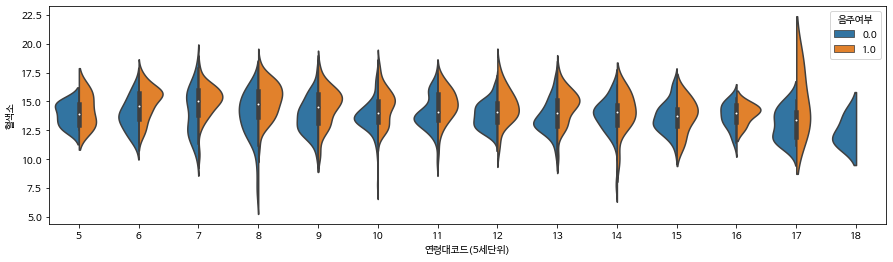

In [ ]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x="연령대코드(5세단위)",y="혈색소",hue="음주여부",split=True)

### swarm plot 
- 범주형 데이터를 산점도로 시각화하고자 할 때 사용합니다.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; y

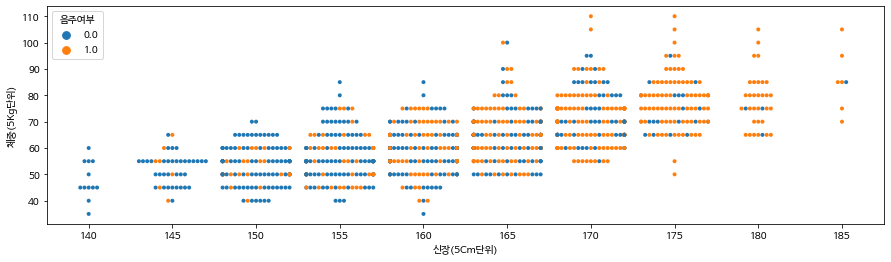

In [ ]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.

plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x="신장(5Cm단위)",y="체중(5Kg단위)",hue="음주여부",size=4)
# sns.violinplot(data=df_sample,x="신장(5Cm단위)",y="체중(5Kg단위)")

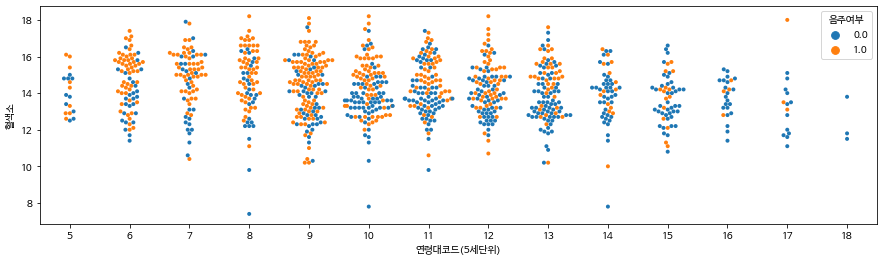

In [ ]:
# swarmplot으로 연령대코드(5세단위)에 따른 음주여부 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.

plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x="연령대코드(5세단위)",y="혈색소",hue="음주여부", size=4)

<Figure size 1080x288 with 0 Axes>

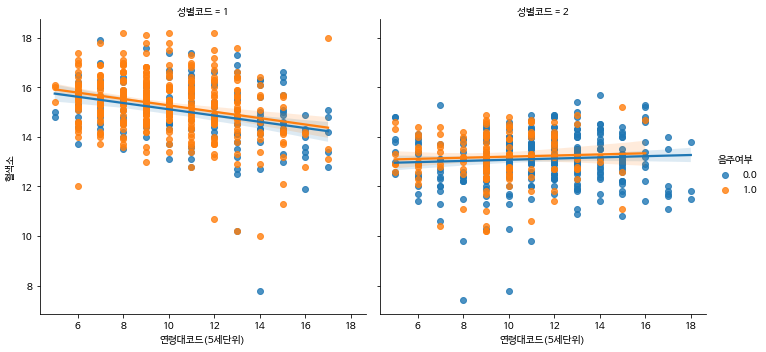

In [ ]:
# lmplot 으로 그리기
plt.figure(figsize=(15,4))
sns.lmplot(data=df_sample,x="연령대코드(5세단위)",y="혈색소",hue="음주여부",col="성별코드")
# 회귀선은 음주여부에 따라 그림